In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
khushikyad001_india_road_accident_dataset_predictive_analysis_path = kagglehub.dataset_download('khushikyad001/india-road-accident-dataset-predictive-analysis')

print('Data source import complete.')

100%|██████████| 68.2k/68.2k [00:00<00:00, 41.0MB/s]

Extracting files...
Data source import complete.


# Table of Content

1) Importing Libraries

2) Loading the Data

3) Cleaning the Data

4) Date related Analysis

5) Categorical Analysis

6) Numerical Analysis

7) Conclusion: Indian Road Accident Insights

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/accident_prediction_india.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   State Name                   3000 non-null   object
 1   City Name                    3000 non-null   object
 2   Year                         3000 non-null   int64 
 3   Month                        3000 non-null   object
 4   Day of Week                  3000 non-null   object
 5   Time of Day                  3000 non-null   object
 6   Accident Severity            3000 non-null   object
 7   Number of Vehicles Involved  3000 non-null   int64 
 8   Vehicle Type Involved        3000 non-null   object
 9   Number of Casualties         3000 non-null   int64 
 10  Number of Fatalities         3000 non-null   int64 
 11  Weather Conditions           3000 non-null   object
 12  Road Type                    3000 non-null   object
 13  Road Condition               3000

## Cleaning the Data

Check for null values:

In [ ]:
#First it's better to take a copy of dataset and work on a copy
df=data.copy()

#Checking null values accross the dataset
df.isnull().sum().sort_values(ascending=False)

,0
Driver License Status,975
Traffic Control Presence,716
Year,0
Month,0
State Name,0
City Name,0
Time of Day,0
Day of Week,0
Accident Severity,0
Number of Vehicles Involved,0


In [ ]:
df['Driver License Status'].value_counts()

,count
Driver License Status,
Valid,1057
Expired,968


In [ ]:
df['Traffic Control Presence'].value_counts()

,count
Traffic Control Presence,
Signs,812
Signals,736
Police Checkpost,736


In [ ]:
df['Driver License Status']=df['Driver License Status'].fillna('Unknown')
df['Traffic Control Presence']=df['Traffic Control Presence'].fillna('Unknown')

Check for duplicated rows:

In [ ]:
df.duplicated().sum()

np.int64(0)

- Fortunately, there are no duplicate rows.

## Date related Analysis

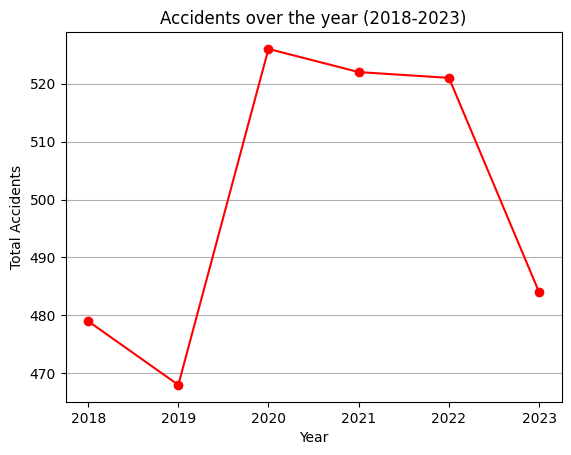

In [ ]:
df['Year']=pd.to_datetime(df['Year'],format='%Y')
yearly_accident=df.groupby('Year')['Accident Severity'].count()

#Let's plot yearly_accidents to hvae better intuition.

plt.plot(yearly_accident.index,yearly_accident.values,marker='o',linestyle='-',color='red')
plt.title('Accidents over the year (2018-2023)')
plt.xlabel('Year')
plt.ylabel('Total Accidents')
plt.grid(axis='y')
plt.show()

## Categorical Analysis

In [ ]:
#Let's see the number of unique categories in each column:

cat_features=list(df.select_dtypes(include=object).columns)
for i in cat_features:
    print(f'{i}: {df[i].nunique()}')

State Name: 32
City Name: 28
Month: 12
Day of Week: 7
Accident Severity: 3
Vehicle Type Involved: 7
Weather Conditions: 5
Road Type: 4
Road Condition: 4
Lighting Conditions: 4
Traffic Control Presence: 4
Driver Gender: 2
Driver License Status: 3
Alcohol Involvement: 2
Accident Location Details: 4
Time_Category: 4


In [ ]:
#Since Time of Day has a lot of unique values it's not recomended to plot it using countplots so I remove it from the plot list
cat_columns=cat_features.remove('Time of Day')

ValueError: list.remove(x): x not in list

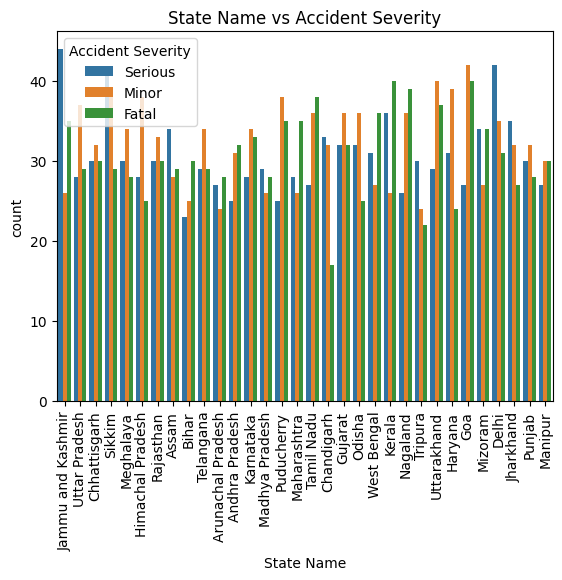

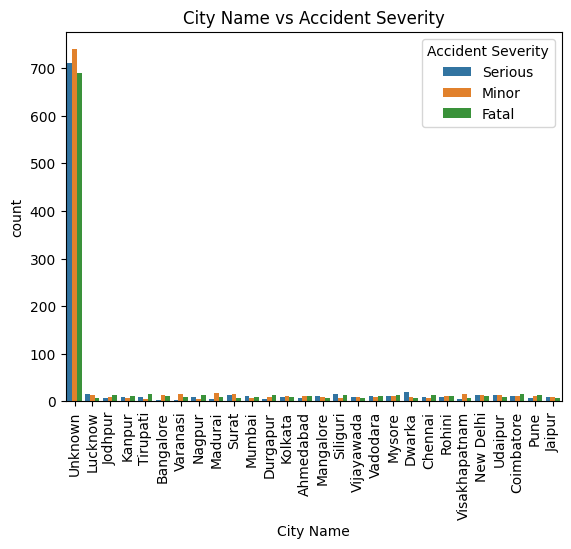

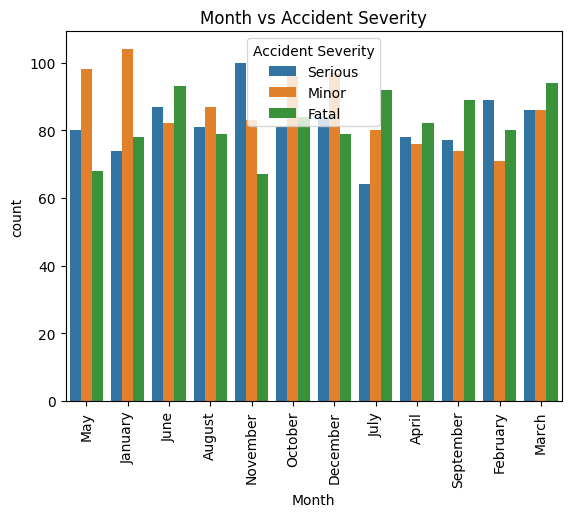

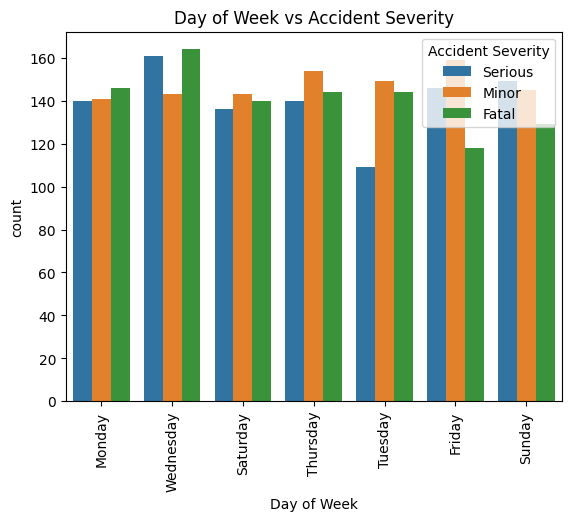

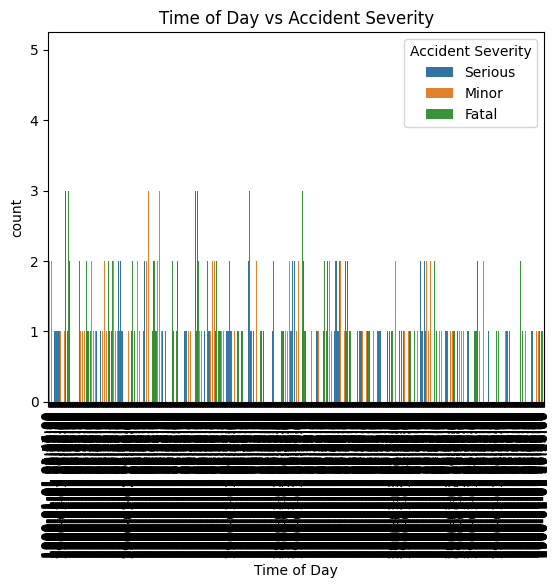

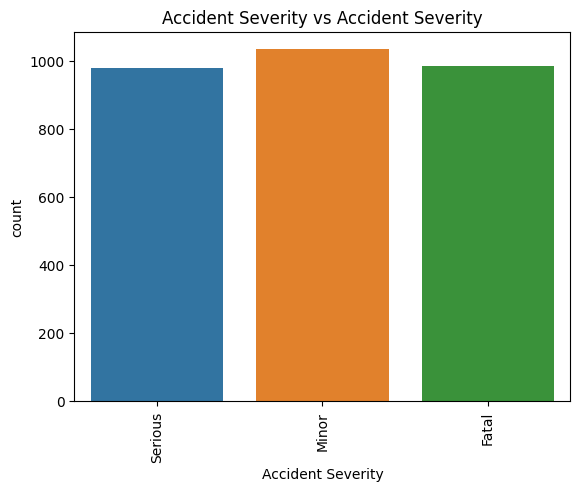

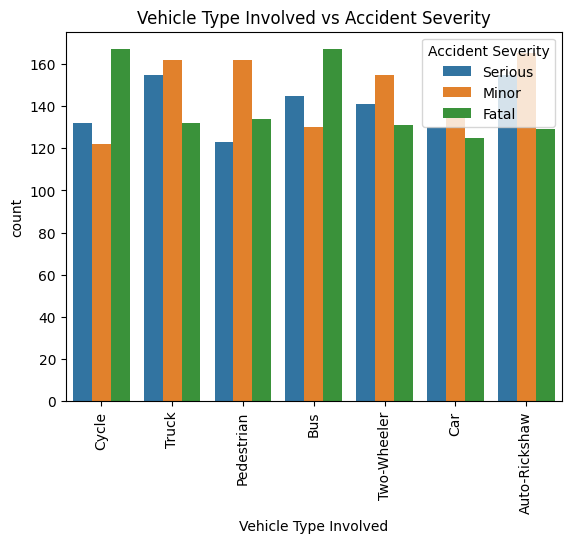

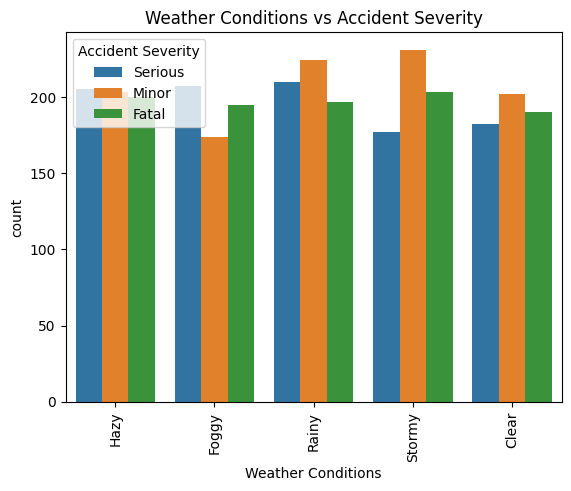

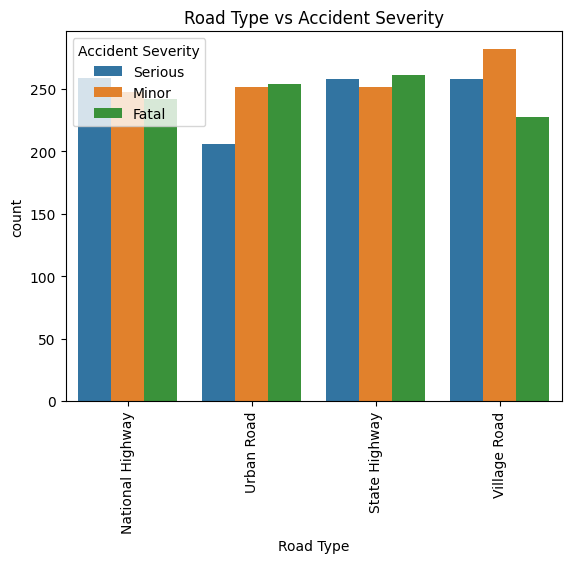

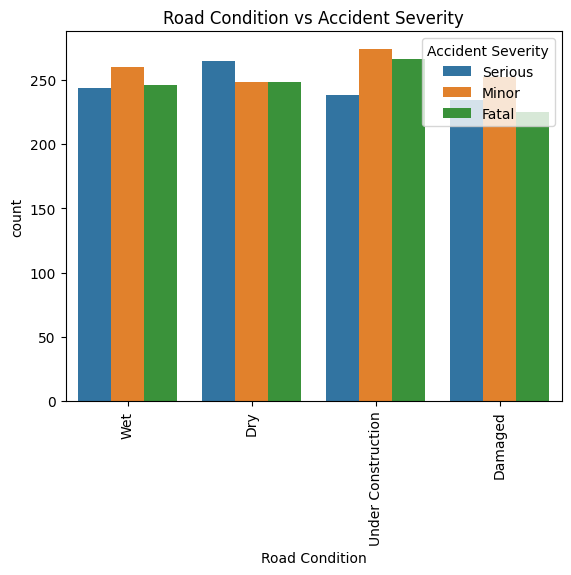

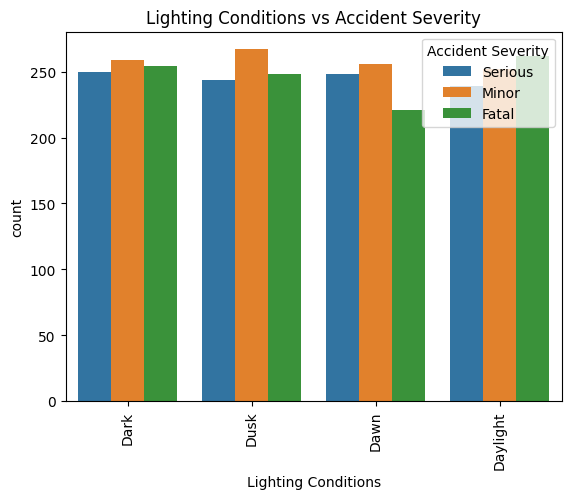

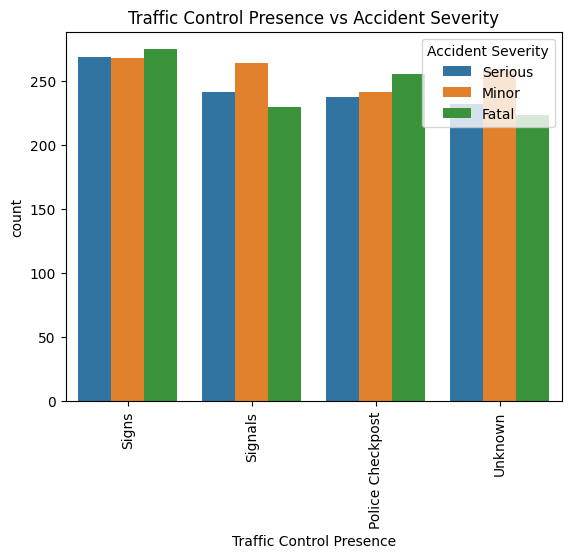

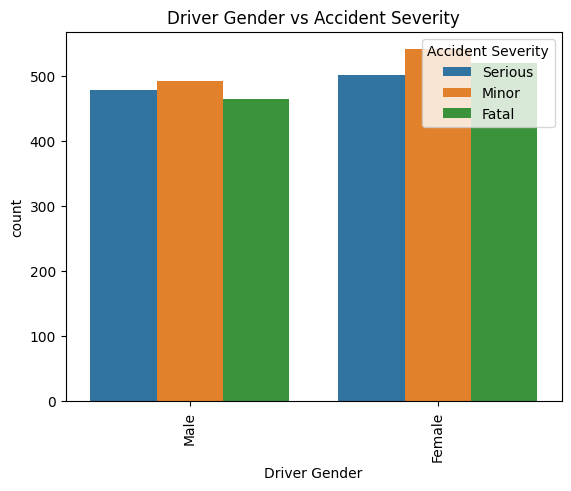

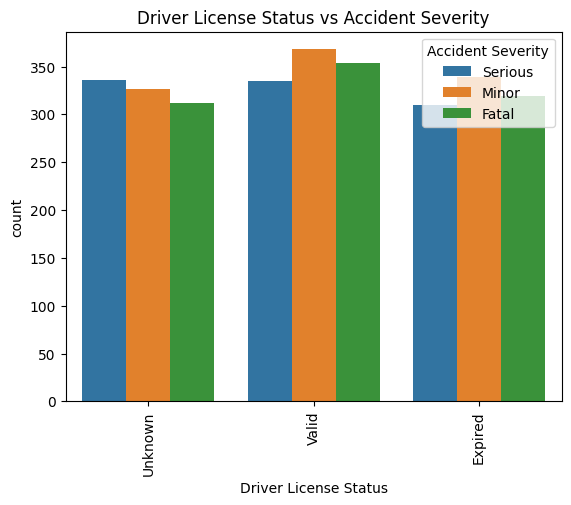

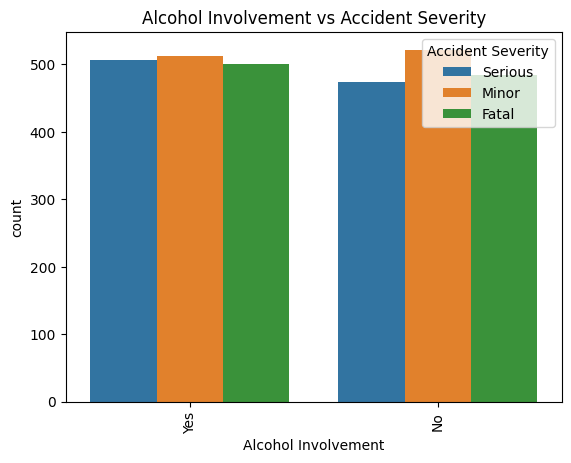

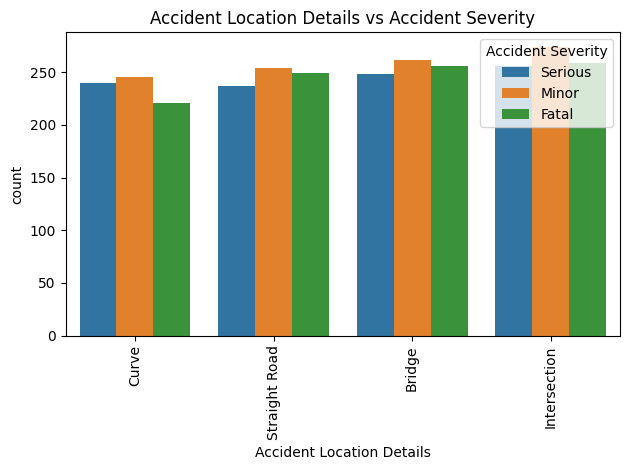

In [ ]:
for i in cat_features:
    plt.figure()
    sns.countplot(data=df,x=i,hue='Accident Severity')
    plt.xticks(rotation=90)
    plt.title(f'{i} vs Accident Severity')

plt.tight_layout()
plt.show()

In [ ]:
#Let's analyse the Time of Day that we droped recently from the cat_features list

def categorize_time(hour):
    if 5 <= hour < 12:
        return "Morning (5AM-12PM)"
    elif 12 <= hour < 17:
        return "Afternoon (12PM-5PM)"
    elif 17 <= hour < 21:
        return "Evening (5PM-9PM)"
    else:
        return "Night (9PM-5AM)"

df["Time of Day"] = pd.to_datetime(df["Time of Day"], format="%H:%M")
df["Time_Category"] = df["Time of Day"].dt.hour.apply(categorize_time)


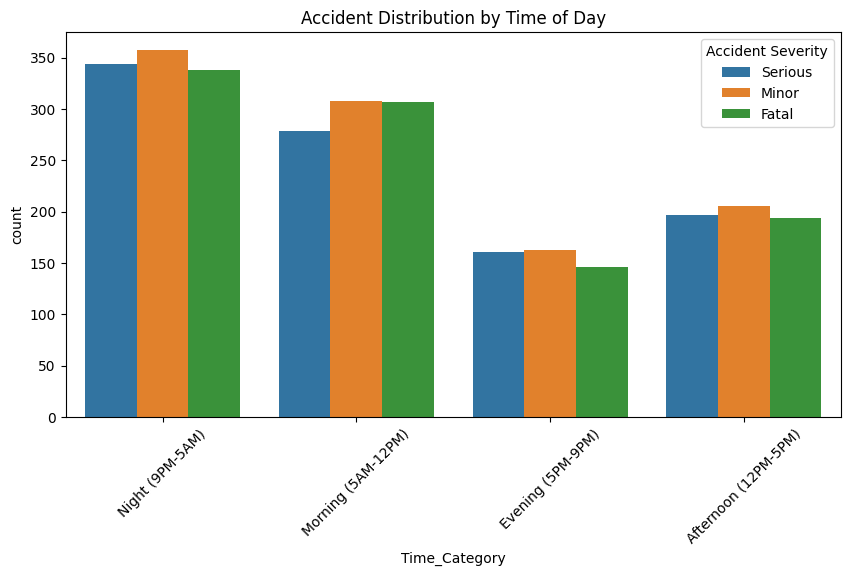

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="Time_Category", data=df,hue='Accident Severity')
plt.title("Accident Distribution by Time of Day")
plt.xticks(rotation=45)
plt.show()

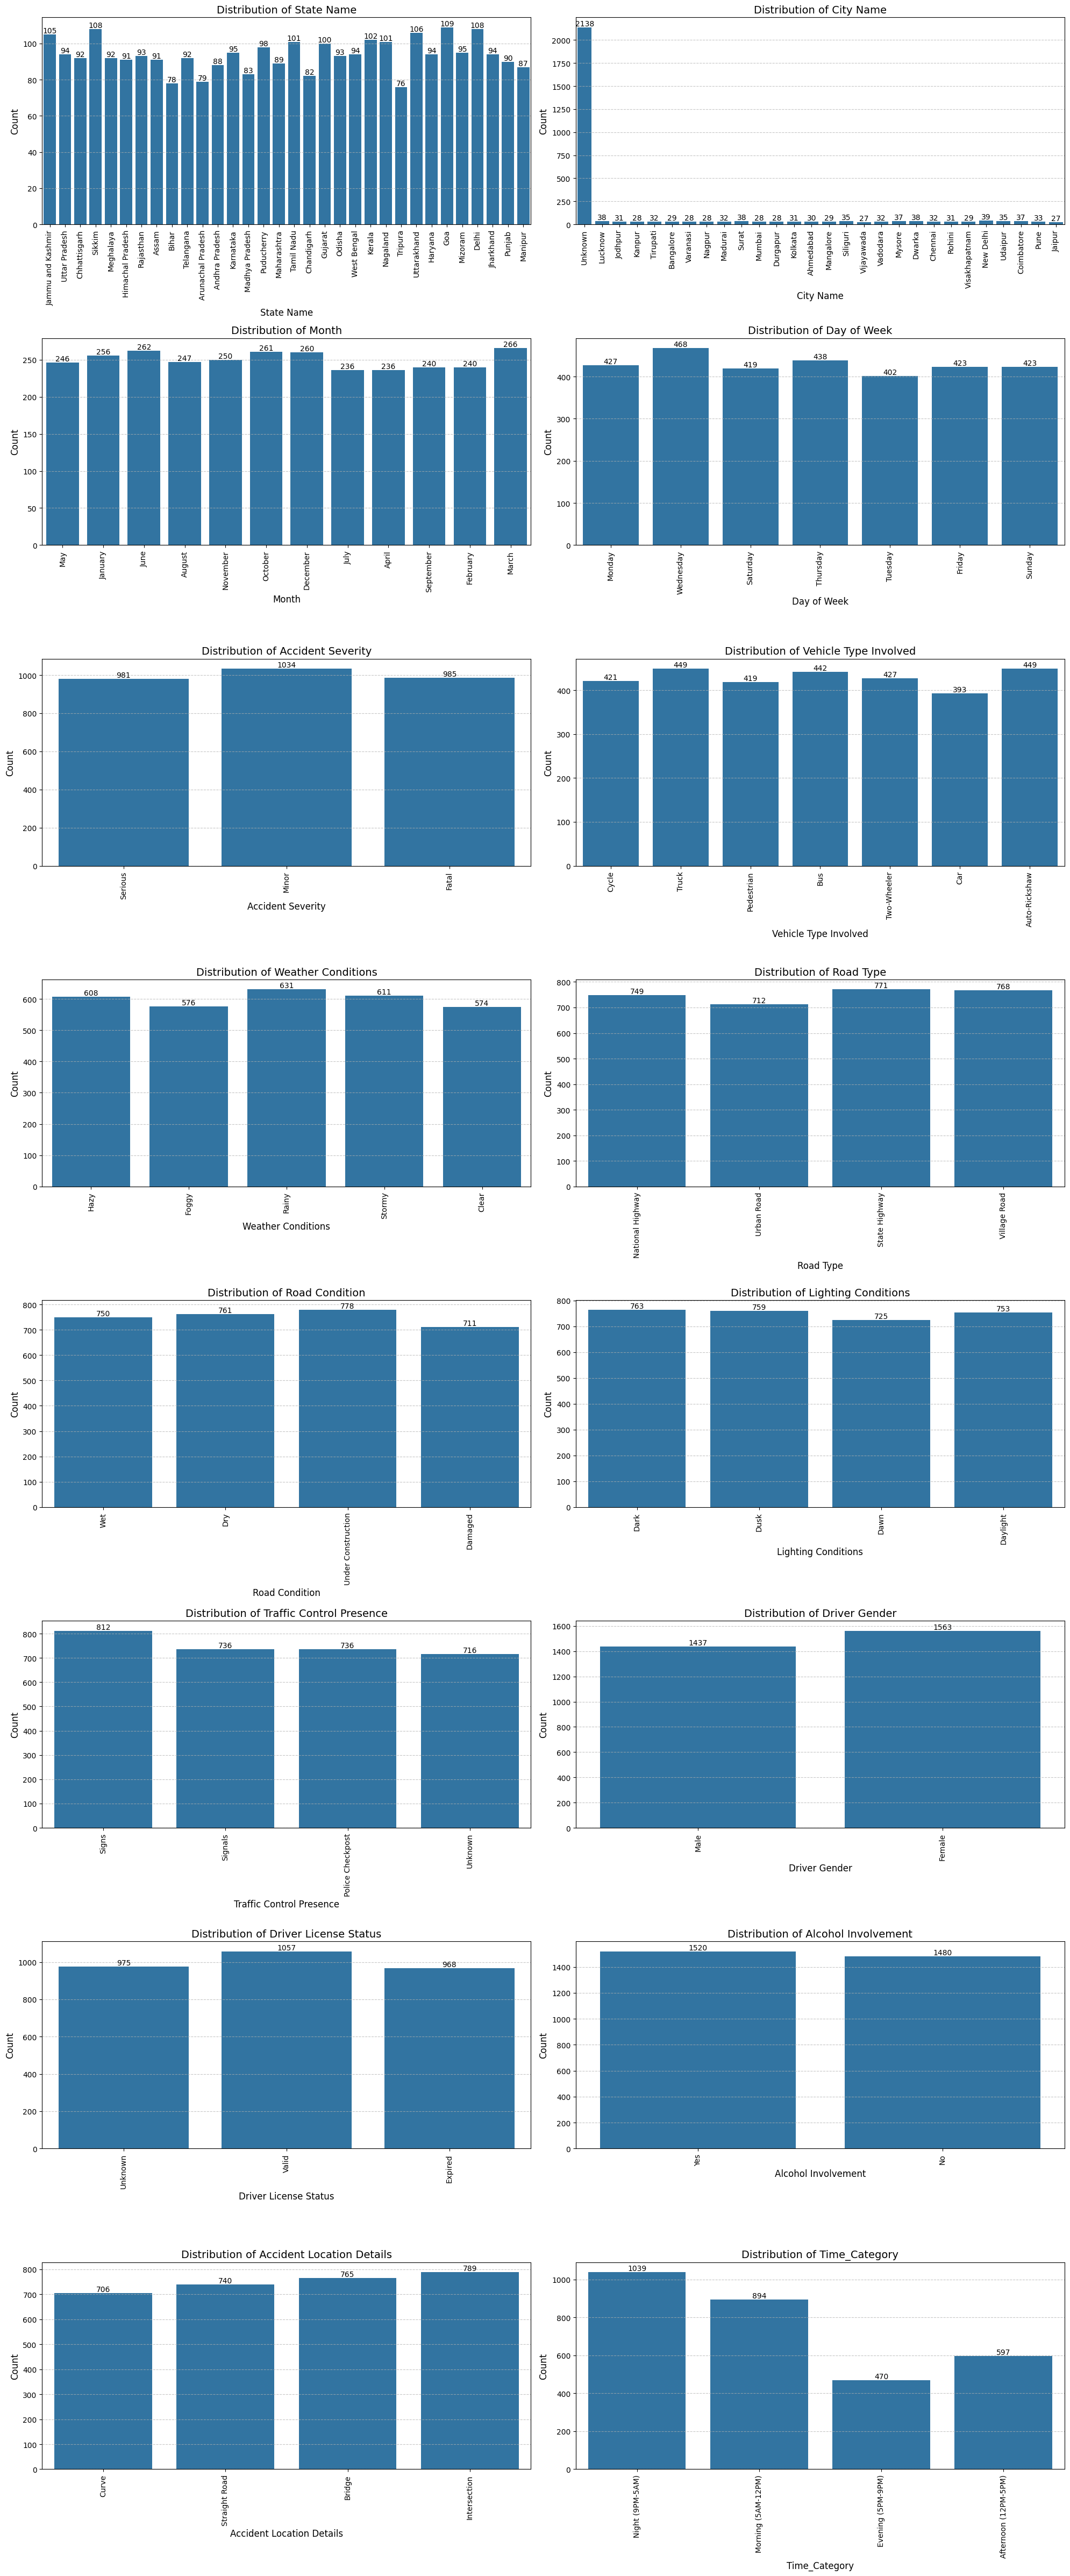

In [ ]:

num_columns=2
num_rows=(len(cat_features)+1)//num_columns

fig,axes=plt.subplots(num_rows,num_columns,figsize=(20,num_rows * 6))
axes=axes.flatten()

for i , col in enumerate(cat_features):
    ax=axes[i]
    sns.countplot(data=df,x=col,ax=ax)

    for container in ax.containers:
        ax.bar_label(container)

    ax.set_title(f'Distribution of {col}',fontsize=14)
    ax.set_xlabel(col,fontsize=12)
    ax.set_ylabel('Count',fontsize=12)
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    ax.grid(axis='y',alpha=0.7,linestyle='--')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

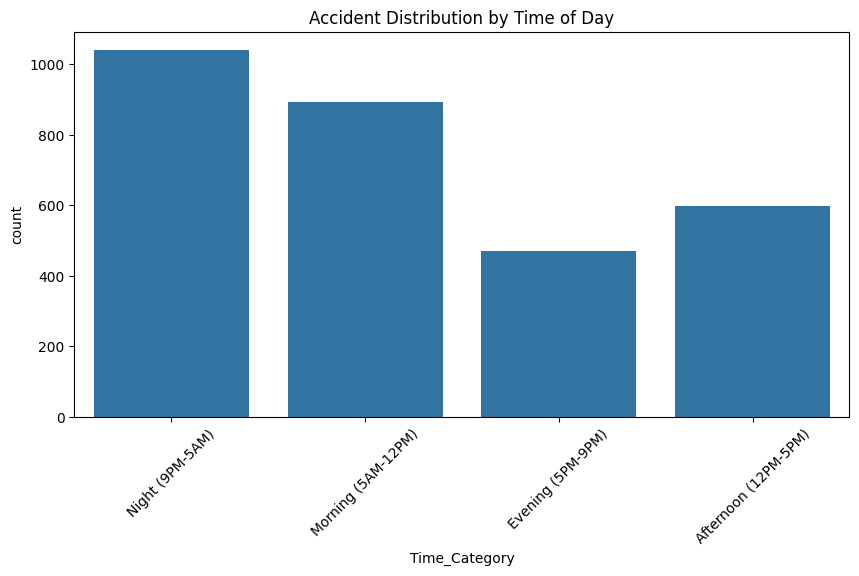

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="Time_Category", data=df)
plt.title("Accident Distribution by Time of Day")
plt.xticks(rotation=45)
plt.show()

## Numerical Analysis

In [ ]:
num_features=list(df.select_dtypes(exclude=['object','datetime64[ns]']).columns)

#Let's seperate the continuous numerical columns from discrete ones
continueus_features=['Driver Age','Speed Limit (km/h)']
discrete_features=[i for i in num_features if i not in continueus_features ]


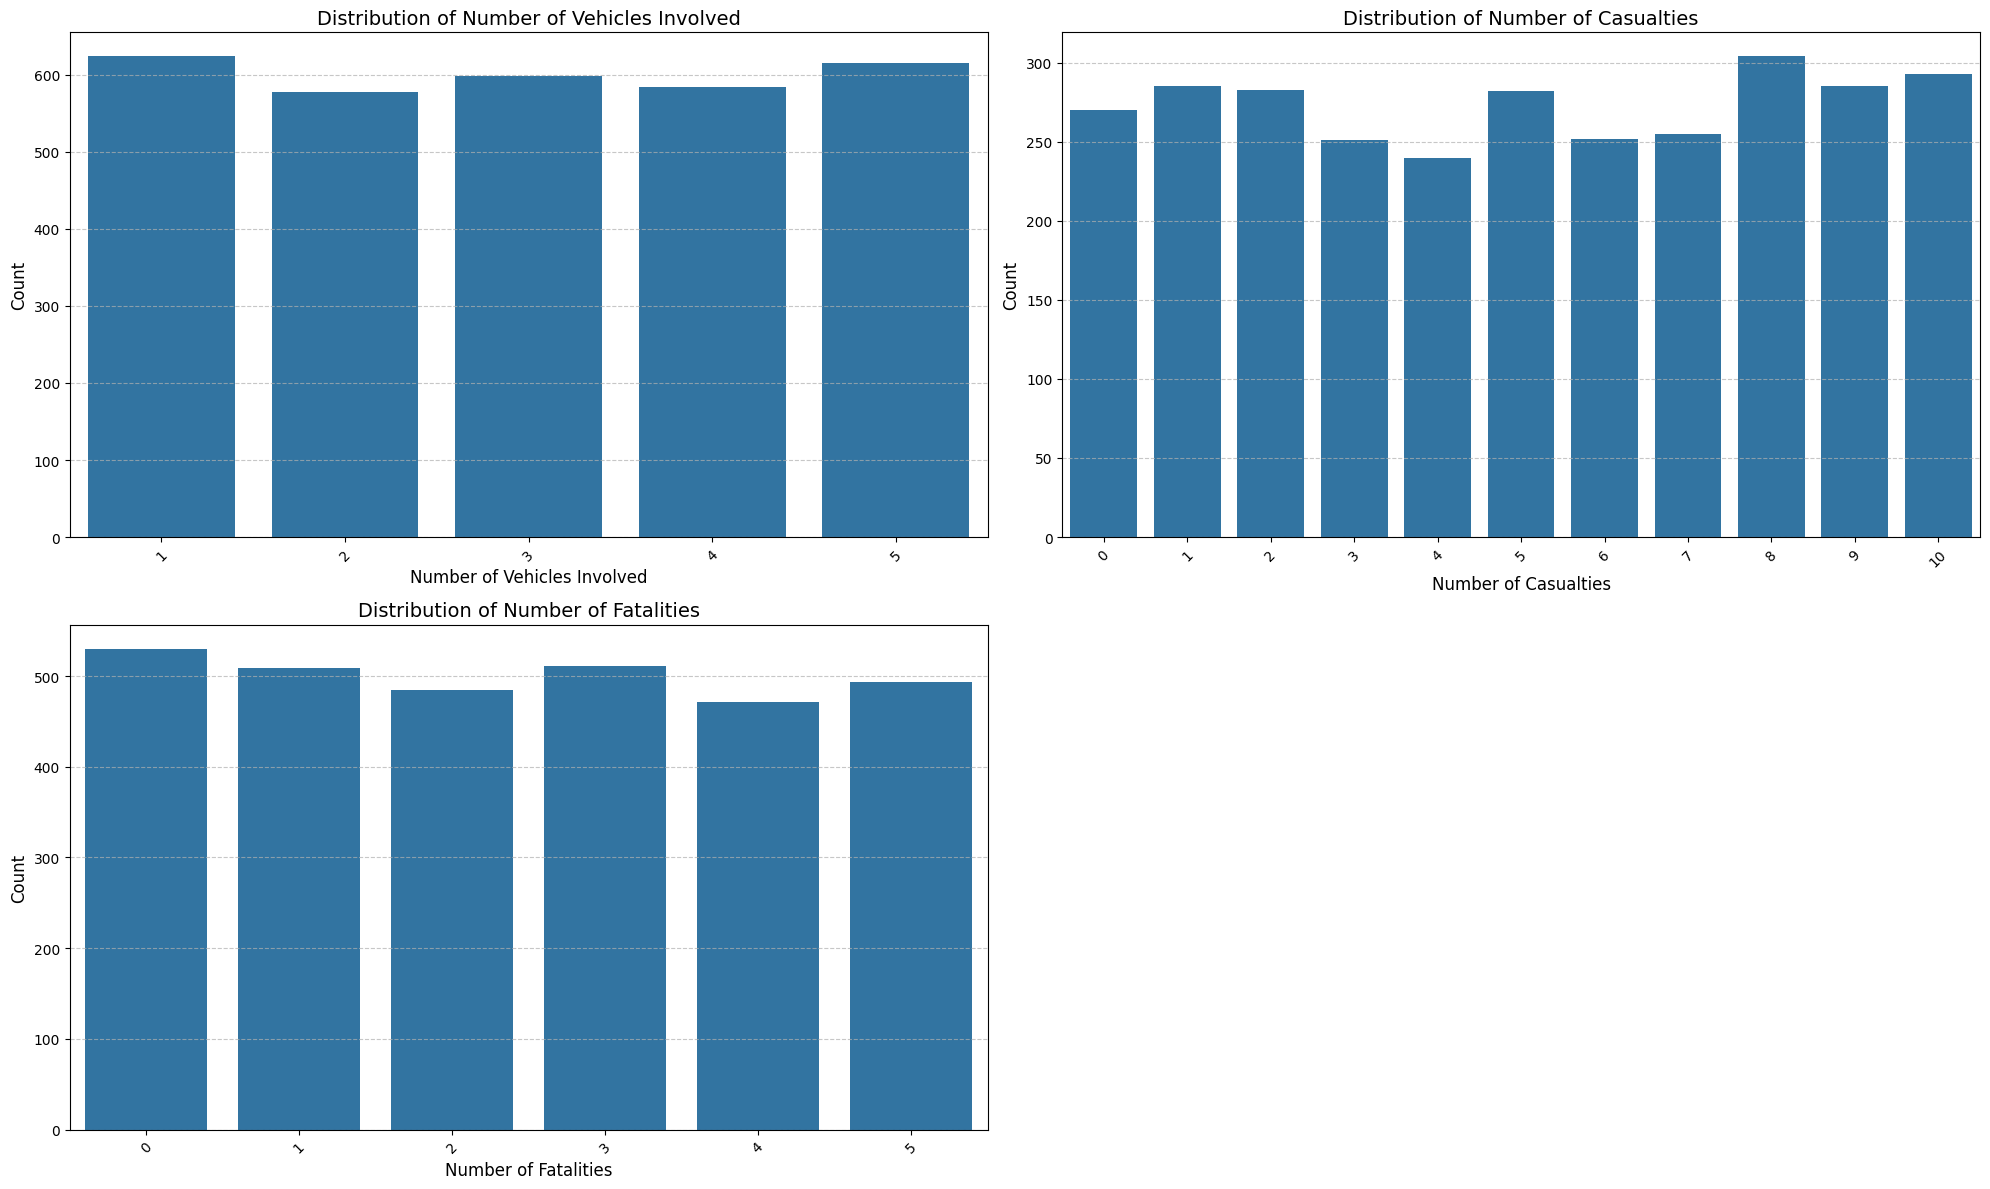

In [ ]:

num_columns=2
num_row=((len(discrete_features)+1)//num_columns)

fig,axes=plt.subplots(num_row,num_columns,figsize=(20,num_row * 6))
axes=axes.flatten()

for i,col in enumerate(discrete_features):
    ax=axes[i]
    sns.countplot(data=df,x=col,ax=ax)

    ax.set_title(f"Distribution of {col}", fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)

    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    ax.grid(axis='y', linestyle='--', alpha=0.7)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



In [ ]:

num_columns=2
num_row=((len(discrete_features)+1)//num_columns)

fig,axes=plt.subplots(num_row,num_columns,figsize=(20,num_row * 6))
axes=axes.flatten()

for i,col in enumerate(discrete_features):
    ax=axes[i]
    sns.countplot(data=df,x=col,ax=ax,hue='Accident Severity')

    ax.set_title(f"Distribution of {col}", fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)

    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    ax.grid(axis='y', linestyle='--', alpha=0.7)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



In [ ]:
df[continueus_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Driver Age,3000.0,44.177000,15.402860,18.0,31.0,45.0,57.0,70.0
Speed Limit (km/h),3000.0,74.940667,26.765088,30.0,51.0,75.0,99.0,120.0


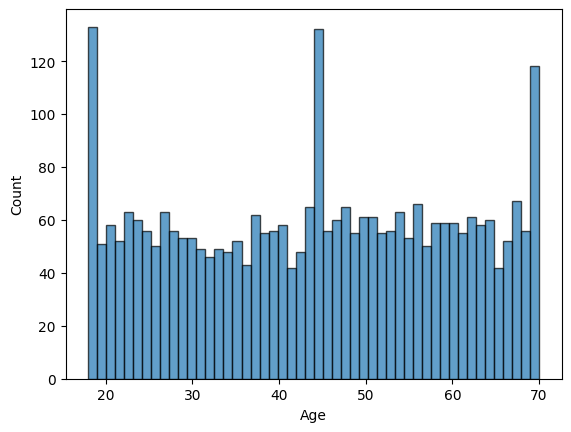

In [ ]:
plt.figure()
plt.hist(df[continueus_features[0]],bins=50,edgecolor='black',alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

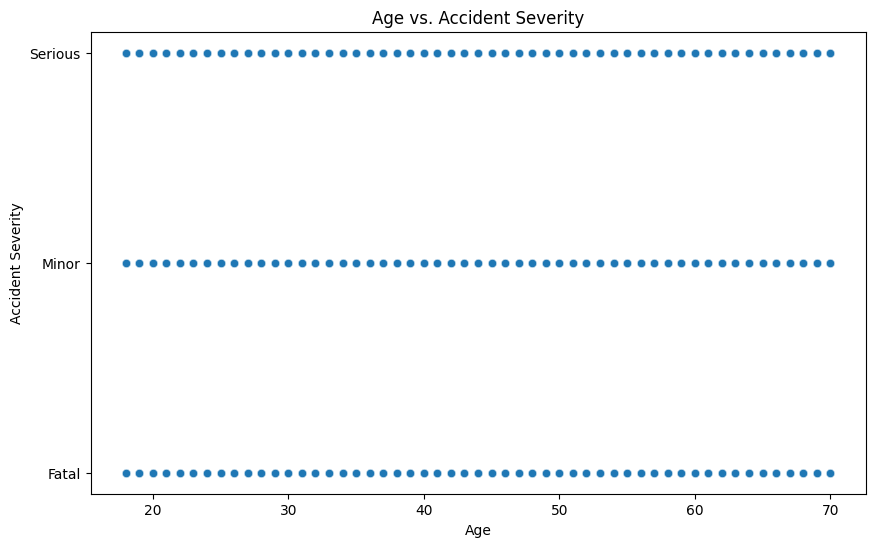

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["Driver Age"], y=df["Accident Severity"], alpha=0.6)
plt.title("Age vs. Accident Severity")
plt.xlabel("Age")
plt.ylabel("Accident Severity")
plt.show()

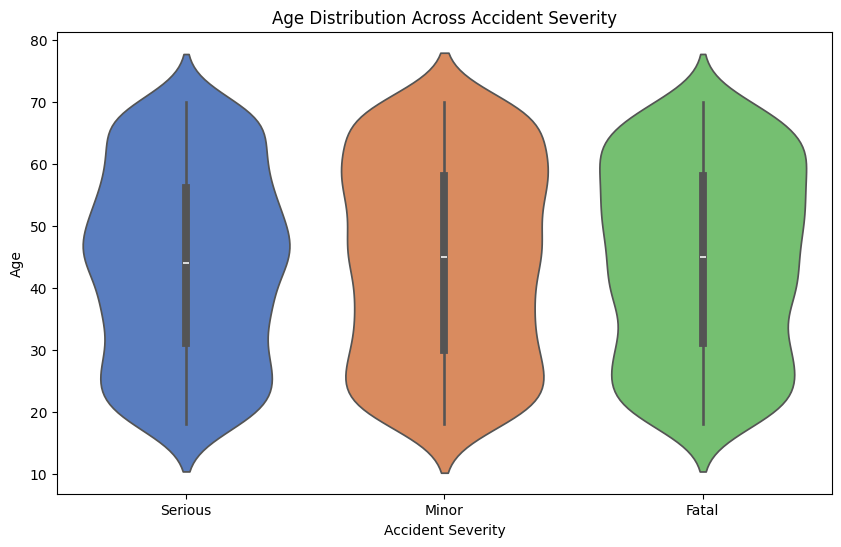

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(x=df["Accident Severity"], y=df["Driver Age"], palette="muted",hue=df["Accident Severity"])
plt.title("Age Distribution Across Accident Severity")
plt.xlabel("Accident Severity")
plt.ylabel("Age")
plt.show()

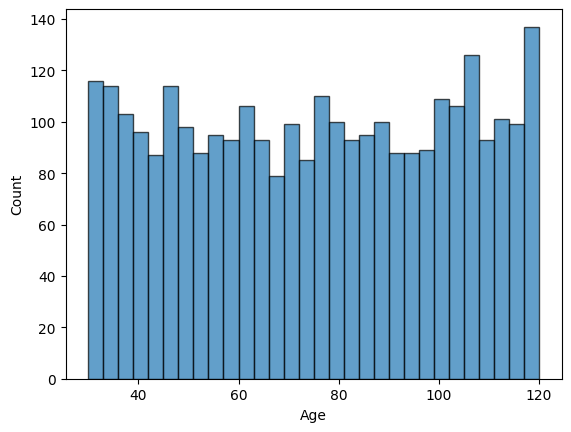

In [ ]:
continueus_features=['Driver Age','Speed Limit (km/h)']

plt.figure()
plt.hist(df[continueus_features[1]],bins=30,edgecolor='black',alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

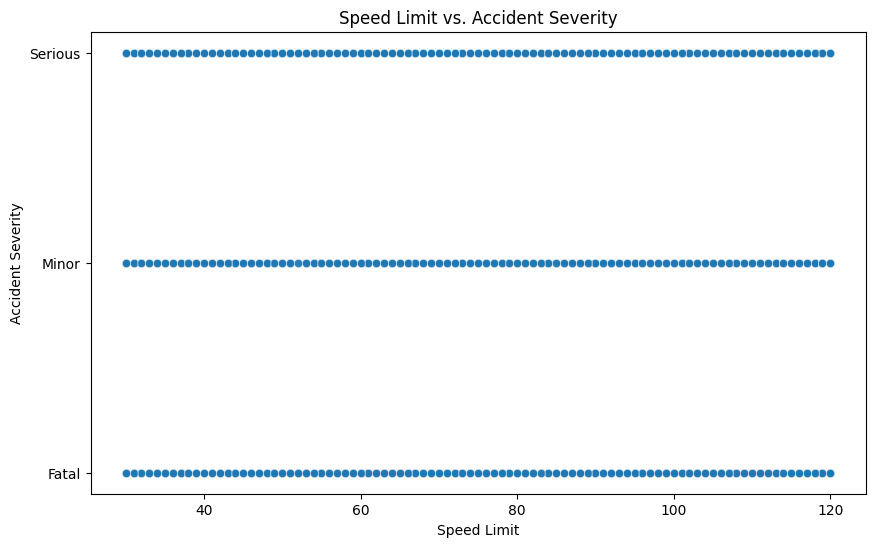

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["Speed Limit (km/h)"], y=df["Accident Severity"], alpha=0.6)
plt.title("Speed Limit vs. Accident Severity")
plt.xlabel("Speed Limit")
plt.ylabel("Accident Severity")
plt.show()

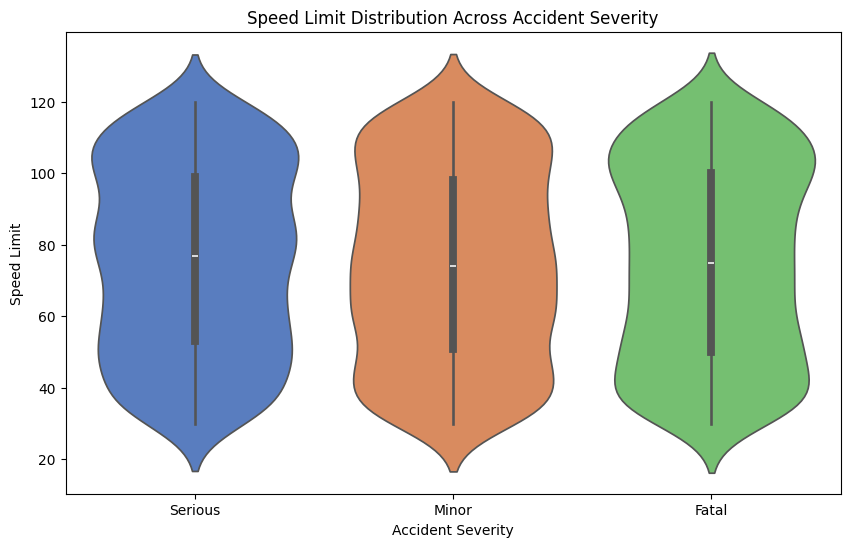

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(x=df["Accident Severity"], y=df["Speed Limit (km/h)"], palette="muted",hue=df["Accident Severity"])
plt.title("Speed Limit Distribution Across Accident Severity")
plt.xlabel("Accident Severity")
plt.ylabel("Speed Limit")
plt.show()